In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Membaca 3 file csv luas lahan
df_luas_lahan_2022 = pd.read_csv('Luas Panen, Produktivitas, dan Produksi Padi Menurut Kabupaten_Kota di Provinsi Jawa Barat, 2022.csv')
df_luas_lahan_2023 = pd.read_csv('Luas Panen, Produktivitas, dan Produksi Padi Menurut Kabupaten_Kota di Provinsi Jawa Barat, 2023 (1).csv')
df_luas_lahan_2024 = pd.read_csv('Luas Panen, Produktivitas, dan Produksi Padi Menurut Kabupaten_Kota di Provinsi Jawa Barat, 2024 (1).csv')

# Membaca 3 file csv konsumsi beras perkapita
df_konsumsi_beras_2022 = pd.read_csv('Rata-rata Konsumsi Perkapita Seminggu Menurut Kelompok Padi-Padian Per Kabupaten_kota, 2022.csv')
df_konsumsi_beras_2023 = pd.read_csv('Rata-rata Konsumsi Perkapita Seminggu Menurut Kelompok Padi-Padian Per Kabupaten_kota, 2023 (1).csv')
df_konsumsi_beras_2024 = pd.read_csv('Rata-rata Konsumsi Perkapita Seminggu Menurut Kelompok Padi-Padian Per Kabupaten_kota, 2024 (1).csv')

# Membaca 3 file csv harga beras
df_harga_beras_2022 = pd.read_csv('dataset_harga_beras_2022.csv')
df_harga_beras_2023 = pd.read_csv('dataset_harga_beras_2023.csv')
df_harga_beras_2024 = pd.read_csv('dataset_harga_beras_2024.csv')

In [3]:
# Menambahkan kolom tahun untuk luas lahan
df_luas_lahan_2022["Tahun"] = 2022
df_luas_lahan_2023["Tahun"] = 2023
df_luas_lahan_2024["Tahun"] = 2024

# Menambahkan kolom tahun untuk konsumsi beras perkapita
df_konsumsi_beras_2022["Tahun"] = 2022
df_konsumsi_beras_2023["Tahun"] = 2023
df_konsumsi_beras_2024["Tahun"] = 2024

# Menambahkan kolom tahun untuk harga beras
df_harga_beras_2022["Tahun"] = 2022
df_harga_beras_2023["Tahun"] = 2023
df_harga_beras_2024["Tahun"] = 2024

In [4]:
# Menggabungkan semua dataset luas lahan
df_gabungan_luas_produksi_padi = pd.concat([df_luas_lahan_2022, df_luas_lahan_2023, df_luas_lahan_2024], ignore_index=True) 

# Menggabungkan semua dataset konsumsi beras perkapita
df_gabungan_konsumsi_beras = pd.concat([df_konsumsi_beras_2022, df_konsumsi_beras_2023, df_konsumsi_beras_2024], ignore_index=True)

# Menggabungkan semua dataset harga beras
df_gabungan_harga_beras = pd.concat([df_harga_beras_2022, df_harga_beras_2023, df_harga_beras_2024], ignore_index=True)

In [5]:
# Menyimpan dataset gabungan luas lahan
df_gabungan_luas_produksi_padi.to_csv("dataset_gabungan_padi_2022_2024.csv", index=False)

# Menyimpan dataset gabungan konsumsi beras perkapita
df_gabungan_konsumsi_beras.to_csv("dataset_gabungan_konsumsi_beras_2022_2024.csv", index=False)

# Menyimpan dataset gabungan harga beras
df_gabungan_harga_beras.to_csv("dataset_gabungan_harga_beras_2022_2024.csv", index=False)

In [6]:
df_gabungan_luas_produksi_padi.head()

,Kabupaten/Kota,Luas Panen Tanaman Padi (ha) (Ha),Produktivitas Tanaman Padi (ku/ha) (Ku/ha),Rekap Produksi Padi (ton) (Ton),Tahun
0,Bogor,56002.23,53.55,299893.80,2022
1,Sukabumi,95012.99,53.49,508220.48,2022
2,Cianjur,115877.18,53.33,617941.03,2022
3,Bandung,47537.79,60.84,289205.70,2022
4,Garut,75951.04,58.11,441316.20,2022


In [7]:
df_gabungan_konsumsi_beras.head()

,Kabupaten/Kota,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Tahun
0,NaN,Rata-rata Konsumsi Perkapita Seminggu Menurut ...,NaN,NaN,NaN,NaN,NaN,NaN,2022
1,NaN,PADI-PADIAN,"Beras (beras lokal, kualitas unggul, impor)",Beras ketan,Jagung basah dengan kulit,Jagung pipilan/beras jagung/jagung titil,Tepung terigu,Padi-padian lainnya,2022
2,NaN,2022,2022,2022,2022,2022,2022,2022,2022
3,Simeulue,0,2.075,0.022,0.002,-,0.014,-,2022
4,Aceh Singkil,0,1.621,0.007,0.057,0,0.059,0,2022


In [8]:
df_gabungan_harga_beras.head()

,Kabupaten/Regency,Jan,Feb,Mar,Apr,Mei,Jun,Jul,Ags,Sep,Okt,Nov,Des,Rata-rata/Average,Tahun
0,1 Kab. Bogor,9657,9700,9729,9614,9300,9371,9457,9714,9986,10071,10200,10443,9770,2022
1,2 Kab. Sukabumi,10073,10192,10013,9700,9636,9200,9464,9521,10171,10169,10100,10631,9903,2022
2,3 Kab. Cianjur,11280,11247,11313,11412,11000,11160,11227,11253,11267,10833,11107,11236,11206,2022
3,4 Kab. Bandung,10729,10607,10607,10800,10786,10657,10843,10786,10840,10914,10971,11100,10786,2022
4,5 Kab. Garut,10686,10760,10760,10820,10710,10710,10710,10710,10710,10710,10710,10710,10726,2022


In [9]:
# Membuat list nama kabupaten di Jawa Barat
daftar_kabupaten_jawa_barat = [
    "Bogor", "Sukabumi", "Cianjur", "Bandung", "Garut", "Tasikmalaya",
    "Ciamis", "Kuningan", "Cirebon", "Majalengka", "Sumedang", "Indramayu",
    "Subang", "Purwakarta", "Karawang", "Bekasi", "Bandung Barat", "Pangandaran"
]

In [10]:
# Rename kolom dataset luas lahan
df_gabungan_luas_produksi_padi = df_gabungan_luas_produksi_padi.rename(columns={
    "Kabupaten/Kota" : "Kabupaten",
    "Luas Panen Tanaman Padi (ha) (Ha)" : "Luas_Lahan_Padi_(Ha)",
    "Produktivitas Tanaman Padi (ku/ha) (Ku/ha)" : "Produktivitas_Tanaman_Padi_(Ku/ha)",
    "Rekap Produksi Padi (ton) (Ton)" : "Produksi_Padi_(Ton)"
})

# Rename kolom dataset konsumsi beras perkapita
df_gabungan_konsumsi_beras = df_gabungan_konsumsi_beras.rename(columns={
    "Kabupaten/Kota" : "Kabupaten",
    "Unnamed: 1" : "Padi_Padian",
    "Unnamed: 2" : "Beras",
    "Unnamed: 3" : "Beras_Ketan",
    "Unnamed: 4" : "Jagung_Basah",
    "Unnamed: 5" : "Beras_Jagung",
    "Unnamed: 6" : "Tepung_Terigu",
    "Unnamed: 7" : "Padi_Padian_Lainnya"
})

# Rename kolom dataset harga beras
df_gabungan_harga_beras = df_gabungan_harga_beras.rename(columns={
    "Kabupaten/Regency" : "Kabupaten",
    "Rata-rata/Average" : "Rata_Rata"
})

In [11]:
# Filter hanya kabupaten di dataset luas lahan
df_luas_kabupaten = df_gabungan_luas_produksi_padi[
    df_gabungan_luas_produksi_padi["Kabupaten"].isin(daftar_kabupaten_jawa_barat)
]

df_luas_kabupaten = df_luas_kabupaten.reset_index(drop=True)

df_luas_kabupaten

,Kabupaten,Luas_Lahan_Padi_(Ha),Produktivitas_Tanaman_Padi_(Ku/ha),Produksi_Padi_(Ton),Tahun
0,Bogor,56002.23,53.55,299893.80,2022
1,Sukabumi,95012.99,53.49,508220.48,2022
2,Cianjur,115877.18,53.33,617941.03,2022
3,Bandung,47537.79,60.84,289205.70,2022
4,Garut,75951.04,58.11,441316.20,2022
5,Tasikmalaya,81310.17,53.00,430961.73,2022
6,Ciamis,55844.25,54.74,305676.17,2022
7,Kuningan,48250.13,57.53,277583.76,2022
8,Cirebon,84892.18,58.27,494699.98,2022
9,Majalengka,100950.53,56.08,566087.34,2022


In [12]:
# Filter hanya kabupaten Jawa Barat di dataset konsumsi beras perkapita
df_konsumsi_kabupaten = df_gabungan_konsumsi_beras[
    df_gabungan_konsumsi_beras["Kabupaten"].isin(daftar_kabupaten_jawa_barat)
]

df_konsumsi_kabupaten = df_konsumsi_kabupaten.reset_index(drop=True)

df_konsumsi_kabupaten

,Kabupaten,Padi_Padian,Beras,Beras_Ketan,Jagung_Basah,Beras_Jagung,Tepung_Terigu,Padi_Padian_Lainnya,Tahun
0,Bogor,0,1.613,0.007,0.018,0.003,0.076,0.002,2022
1,Sukabumi,0,1.938,0.015,0.035,0.001,0.097,0,2022
2,Cianjur,0,1.959,0.015,0.027,0.001,0.063,0,2022
3,Bandung,0,1.465,0.001,0.015,0.002,0.05,0.001,2022
4,Garut,0,1.592,0.006,0.026,0.001,0.073,0,2022
5,Tasikmalaya,0,1.75,0.007,0.006,0.001,0.083,0,2022
6,Ciamis,0,1.883,0.015,0.019,0.001,0.128,0,2022
7,Kuningan,0,1.411,0.003,0.021,0.001,0.073,0.001,2022
8,Cirebon,0,1.418,0.004,0.011,0.001,0.033,0.003,2022
9,Majalengka,0,1.523,0.003,0.01,0.001,0.047,-,2022


In [13]:
# Membersihkan isi kabupaten di dataset harga beras
df_gabungan_harga_beras["Kabupaten"] = (
    df_gabungan_harga_beras["Kabupaten"]
    .astype(str)                                # Pastikan bertipe string
    .str.replace(r'^\d+', '', regex=True)       # Hapus angka di depan (1, 2, 3, dst)
    .str.replace('Kab.', '', regex=False)       # Hapus teks "Kab."
    .str.replace('Kabupaten', '', regex=False)  # Hapus teks "Kabupaten"
    .str.replace('.', '', regex=False)          # Hapus titik
    .str.strip()                                # Hapus spasi kiri-kanan
)

In [14]:
# Filter hanya kabupaten Jawa Barat di dataset harga beras
df_harga_kabupaten = df_gabungan_harga_beras[
    df_gabungan_harga_beras["Kabupaten"].isin(daftar_kabupaten_jawa_barat)
]

df_harga_kabupaten = df_harga_kabupaten.reset_index(drop=True)

df_harga_kabupaten

,Kabupaten,Jan,Feb,Mar,Apr,Mei,Jun,Jul,Ags,Sep,Okt,Nov,Des,Rata_Rata,Tahun
0,Bogor,9657,9700,9729,9614,9300,9371,9457,9714,9986,10071,10200,10443,9770,2022
1,Sukabumi,10073,10192,10013,9700,9636,9200,9464,9521,10171,10169,10100,10631,9903,2022
2,Cianjur,11280,11247,11313,11412,11000,11160,11227,11253,11267,10833,11107,11236,11206,2022
3,Bandung,10729,10607,10607,10800,10786,10657,10843,10786,10840,10914,10971,11100,10786,2022
4,Garut,10686,10760,10760,10820,10710,10710,10710,10710,10710,10710,10710,10710,10726,2022
5,Tasikmalaya,9944,9922,9956,9856,9780,9678,9700,9722,9922,9922,10489,10711,9974,2022
6,Ciamis,9250,9283,9329,8429,8843,8700,8779,9029,9836,9933,9833,10250,9283,2022
7,Kuningan,9383,9325,9650,9411,9513,9350,9620,9533,9843,9929,9929,10000,9616,2022
8,Cirebon,8744,9256,8938,8783,8558,8192,8400,8705,9010,9114,9263,10108,8912,2022
9,Majalengka,9200,9163,8650,8338,7788,7988,8088,8763,9300,9375,9363,10150,8847,2022


In [15]:
# Pastikan format kabupaten sama
df_luas_kabupaten["Kabupaten"] = df_luas_kabupaten["Kabupaten"].str.strip()
df_konsumsi_kabupaten["Kabupaten"] = df_konsumsi_kabupaten["Kabupaten"].str.strip()
df_harga_kabupaten["Kabupaten"] = df_harga_kabupaten["Kabupaten"].str.strip()

In [16]:
# Gabungkan dataset Luas Lahan + Konsumsi Beras Perkapita + Harga Beras
df_gabungan_dataset = (
    df_luas_kabupaten
    .merge(df_konsumsi_kabupaten, on=["Kabupaten", "Tahun"], how="inner")
    .merge(df_harga_kabupaten, on=["Kabupaten", "Tahun"], how="inner")
)

df_gabungan_dataset

,Kabupaten,Luas_Lahan_Padi_(Ha),Produktivitas_Tanaman_Padi_(Ku/ha),Produksi_Padi_(Ton),Tahun,Padi_Padian,Beras,Beras_Ketan,Jagung_Basah,Beras_Jagung,...,Apr,Mei,Jun,Jul,Ags,Sep,Okt,Nov,Des,Rata_Rata
0,Bogor,56002.23,53.55,299893.80,2022,0,1.613,0.007,0.018,0.003,...,9614,9300,9371,9457,9714,9986,10071,10200,10443,9770
1,Sukabumi,95012.99,53.49,508220.48,2022,0,1.938,0.015,0.035,0.001,...,9700,9636,9200,9464,9521,10171,10169,10100,10631,9903
2,Cianjur,115877.18,53.33,617941.03,2022,0,1.959,0.015,0.027,0.001,...,11412,11000,11160,11227,11253,11267,10833,11107,11236,11206
3,Bandung,47537.79,60.84,289205.70,2022,0,1.465,0.001,0.015,0.002,...,10800,10786,10657,10843,10786,10840,10914,10971,11100,10786
4,Garut,75951.04,58.11,441316.20,2022,0,1.592,0.006,0.026,0.001,...,10820,10710,10710,10710,10710,10710,10710,10710,10710,10726
5,Tasikmalaya,81310.17,53.00,430961.73,2022,0,1.75,0.007,0.006,0.001,...,9856,9780,9678,9700,9722,9922,9922,10489,10711,9974
6,Ciamis,55844.25,54.74,305676.17,2022,0,1.883,0.015,0.019,0.001,...,8429,8843,8700,8779,9029,9836,9933,9833,10250,9283
7,Kuningan,48250.13,57.53,277583.76,2022,0,1.411,0.003,0.021,0.001,...,9411,9513,9350,9620,9533,9843,9929,9929,10000,9616
8,Cirebon,84892.18,58.27,494699.98,2022,0,1.418,0.004,0.011,0.001,...,8783,8558,8192,8400,8705,9010,9114,9263,10108,8912
9,Majalengka,100950.53,56.08,566087.34,2022,0,1.523,0.003,0.01,0.001,...,8338,7788,7988,8088,8763,9300,9375,9363,10150,8847


In [19]:
# Ambil hanya kolom yang dibutuhkan dari dataset gabungan
df_dataset_final = df_gabungan_dataset[[
    "Kabupaten",
    "Tahun",
    "Luas_Lahan_Padi_(Ha)",
    "Produktivitas_Tanaman_Padi_(Ku/ha)",
    "Produksi_Padi_(Ton)",
    "Beras",
    "Rata_Rata"
]]

# Ganti nama kolom "Rata_Rata" menjadi "Rata_Rata_Harga_Beras"
df_dataset_final = df_dataset_final.rename(columns={
    "Beras" : "Konsumsi_Beras",
    "Rata_Rata" : "Rata_Rata_Harga_Beras"
})

df_dataset_final.to_csv("dataset_final.csv", index=False)

In [ ]:
# Membaca dataset hasil penggabungan final
df = pd.read_csv("dataset_prediksi_harga_beras_final.csv")

In [ ]:
df.head()

,Kabupaten,Tahun,Luas_Lahan_Padi_(Ha),Produktivitas_Tanaman_Padi_(Ku/ha),Produksi_Padi_(Ton),Konsumsi_Beras,Rata_Rata_Harga_Beras
0,Bogor,2022,56002.23,53.55,299893.80,1.613,9770
1,Sukabumi,2022,95012.99,53.49,508220.48,1.938,9903
2,Cianjur,2022,115877.18,53.33,617941.03,1.959,11206
3,Bandung,2022,47537.79,60.84,289205.70,1.465,10786
4,Garut,2022,75951.04,58.11,441316.20,1.592,10726


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Kabupaten                           54 non-null     object 
 1   Tahun                               54 non-null     int64  
 2   Luas_Lahan_Padi_(Ha)                54 non-null     float64
 3   Produktivitas_Tanaman_Padi_(Ku/ha)  54 non-null     float64
 4   Produksi_Padi_(Ton)                 54 non-null     float64
 5   Konsumsi_Beras                      54 non-null     float64
 6   Rata_Rata_Harga_Beras               54 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 3.1+ KB


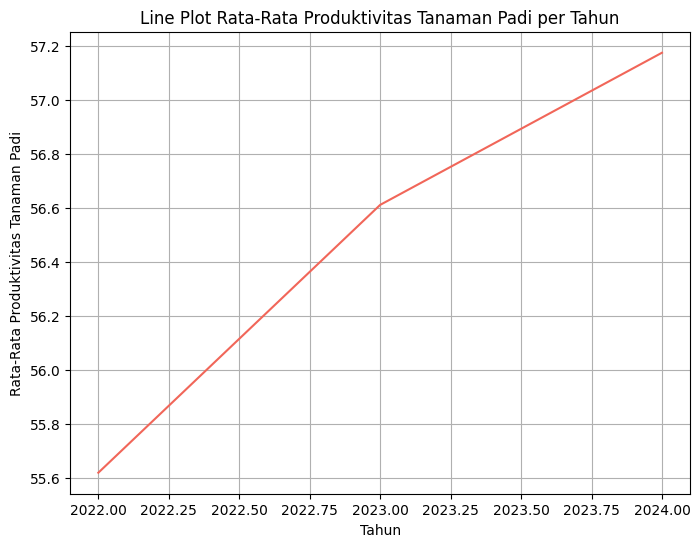

In [ ]:
# Line Plot 1 : Rata-Rata Produktivitas Tanaman Padi per Tahun
avg_produktivitas_by_tahun = df.groupby('Tahun')['Produktivitas_Tanaman_Padi_(Ku/ha)'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_produktivitas_by_tahun.index, avg_produktivitas_by_tahun.values, color='#F16659')
plt.title('Line Plot Rata-Rata Produktivitas Tanaman Padi per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Produktivitas Tanaman Padi')
plt.grid()
plt.show()

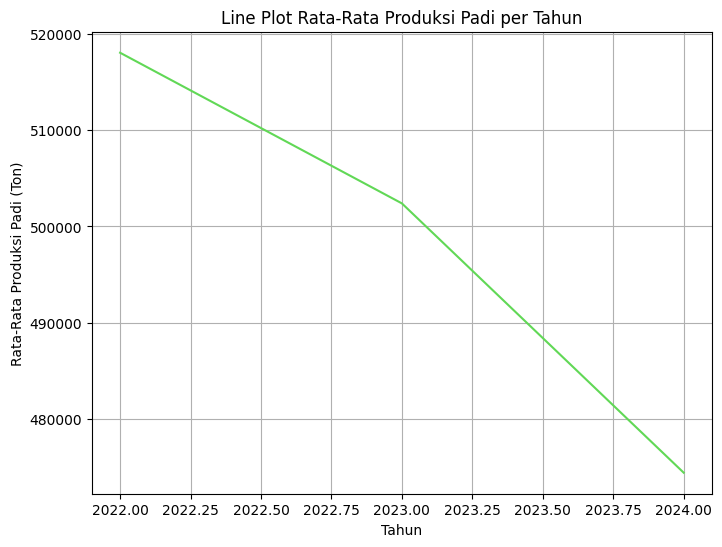

In [ ]:
# Line Plot 2 : Rata-Rata Produksi Padi per Tahun
avg_produksi_by_tahun = df.groupby('Tahun')['Produksi_Padi_(Ton)'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_produksi_by_tahun.index, avg_produksi_by_tahun.values, color='#61D856')
plt.title('Line Plot Rata-Rata Produksi Padi per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Produksi Padi (Ton)')
plt.grid()
plt.show()

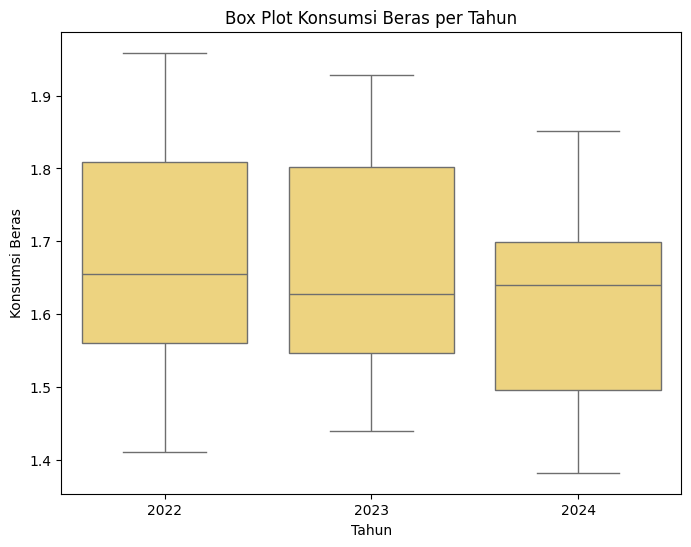

In [ ]:
# Box Plot 1 : Sebaran Konsumsi Beras per Tahun
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tahun', y='Konsumsi_Beras', data=df, color='#FFDD6EEA')
plt.title('Box Plot Konsumsi Beras per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsumsi Beras')
plt.show()

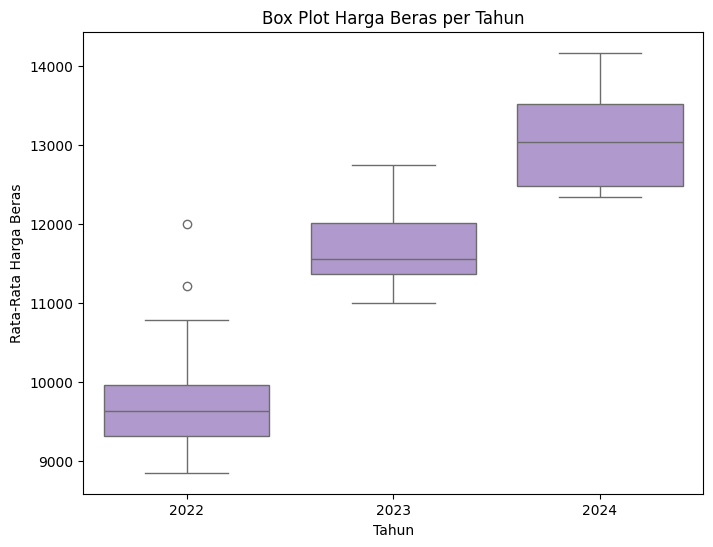

In [ ]:
# Box Plot 2: Sebaran Harga Beras per Tahun
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tahun', y='Rata_Rata_Harga_Beras', data=df, color='#AF91D6')
plt.title('Box Plot Harga Beras per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Harga Beras')
plt.show()

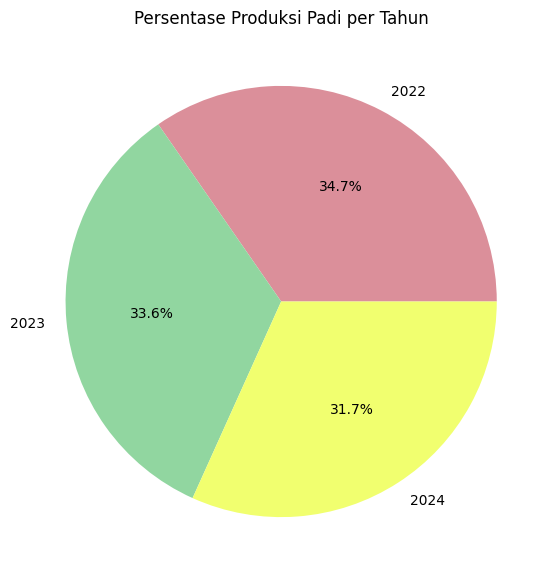

In [ ]:
# Pie Chart 1: Persentase Produksi Padi per Tahun
produksi_tahun = df.groupby('Tahun')['Produksi_Padi_(Ton)'].sum()
plt.figure(figsize=(7, 7))
plt.pie(produksi_tahun.values, labels=produksi_tahun.index, autopct='%1.1f%%', colors=["#DB8F9A", "#91D6A0", "#F1FF6F"])
plt.title('Persentase Produksi Padi per Tahun')
plt.show()

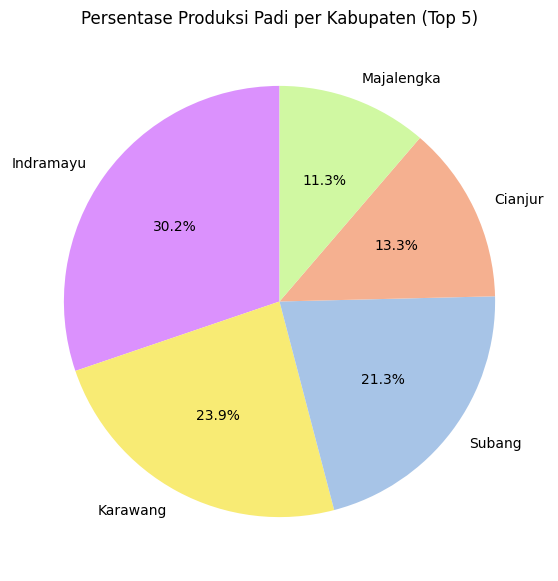

In [ ]:
# Pie Chart 2: Persentase Produksi Padi per Kabupaten (Top 5)
# Mengelompokkan data berdasarkan Kabupaten
# Lalu menjumlahkan total produksi padi tiap kabupaten
top_kabupaten = (
    df.groupby('Kabupaten')['Produksi_Padi_(Ton)']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(7, 7))
plt.pie(top_kabupaten.values, labels=top_kabupaten.index, autopct='%1.1f%%', startangle=90, colors=["#DB91FD", "#F8EB74", "#A7C4E7", "#F5B090", "#D0F8A2"])
plt.title('Persentase Produksi Padi per Kabupaten (Top 5)')
plt.show()


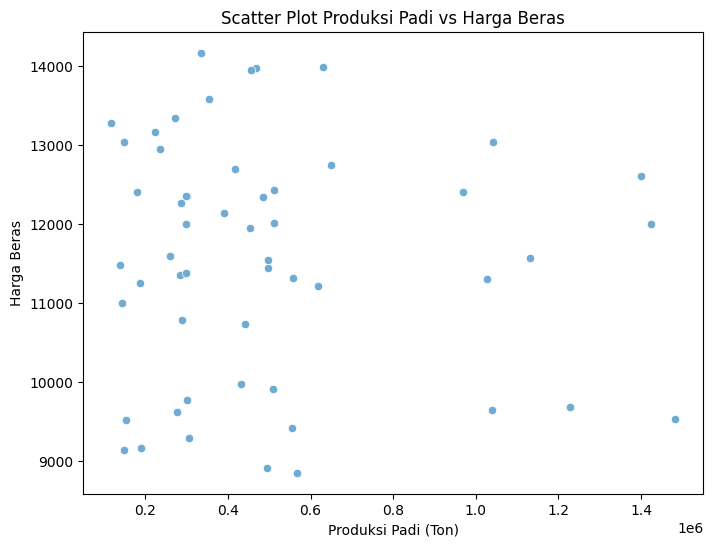

In [ ]:
# Scatter Plot : Produksi Padi vs Harga Beras
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Produksi_Padi_(Ton)', y='Rata_Rata_Harga_Beras', data=df, color="#70ABD3FF")
plt.title('Scatter Plot Produksi Padi vs Harga Beras')
plt.xlabel('Produksi Padi (Ton)')
plt.ylabel('Harga Beras')
plt.show()

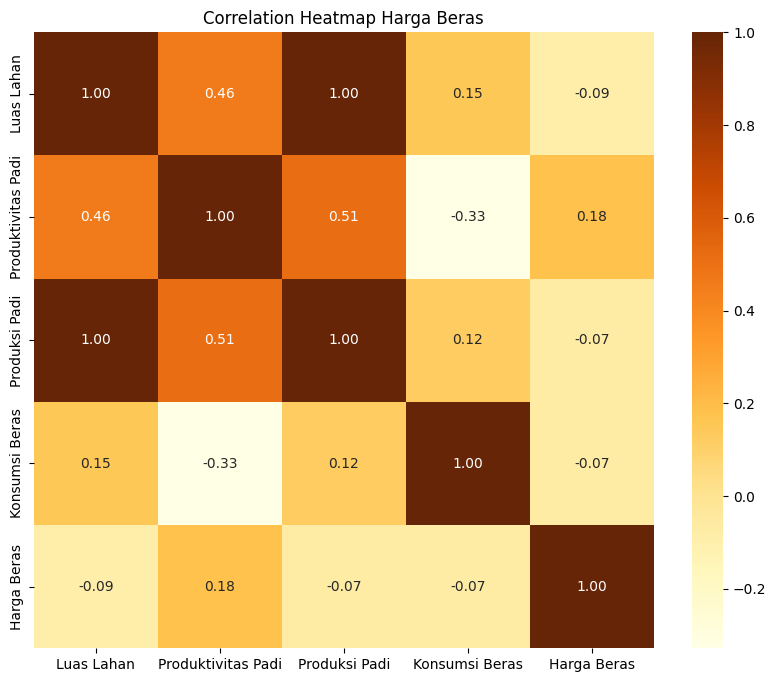

In [ ]:
# Correlation Heatmap
# Memilih hanya kolom numerik (fitur(x) dan label(y))
numerical_features = ['Luas_Lahan_Padi_(Ha)', 'Produktivitas_Tanaman_Padi_(Ku/ha)', 'Produksi_Padi_(Ton)', 'Konsumsi_Beras', 'Rata_Rata_Harga_Beras']

# Mengambil data sesuai kolom diatas lalu menghitung korelasinya
heatmap_data = df[numerical_features].corr()

# Mapping nama panjang -> nama pendek
mapping = {
    'Luas_Lahan_Padi_(Ha)' : 'Luas Lahan', 
    'Produktivitas_Tanaman_Padi_(Ku/ha)' : 'Produktivitas Padi', 
    'Produksi_Padi_(Ton)' : 'Produksi Padi', 
    'Konsumsi_Beras' : 'Konsumsi Beras', 
    'Rata_Rata_Harga_Beras' : 'Harga Beras'
}

# Rename index dan kolom
heatmap_short = heatmap_data.rename(index=mapping, columns=mapping)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_short, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Correlation Heatmap Harga Beras')
plt.show()

In [ ]:
# Memisahkan fitur (x) dan target (y)
X = df[['Luas_Lahan_Padi_(Ha)', 'Produktivitas_Tanaman_Padi_(Ku/ha)', 'Produksi_Padi_(Ton)', 'Konsumsi_Beras']]
y = df['Rata_Rata_Harga_Beras']

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model regresi linier
model_pred_harga_beras = LinearRegression()
model_pred_harga_beras.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Menampilkan intercept regresi dari model
intercept = model_pred_harga_beras.intercept_
intercept 

np.float64(5397.039288016437)

In [ ]:
# Menampilkan koefisien regresi dari model
coefficients = model_pred_harga_beras.coef_
coefficients

array([-1.90073227e-02,  1.01555790e+02,  2.15566752e-03,  5.94944351e+02])

In [ ]:
coefficients2 = pd.DataFrame({
    'Fitur' : X.columns,
    'Koefisien' : model_pred_harga_beras.coef_
})

coefficients2

,Fitur,Koefisien
0,Luas_Lahan_Padi_(Ha),-0.019007
1,Produktivitas_Tanaman_Padi_(Ku/ha),101.555790
2,Produksi_Padi_(Ton),0.002156
3,Konsumsi_Beras,594.944351


In [ ]:
manual = intercept+(81310.17*-1.90073227e-02)+(53.49*1.01555790e+02)+(289205.70*2.15566752e-03)+(1.938*5.94944351e+02)
manual

np.float64(11060.203341461442)

In [ ]:
# Data input untuk prediksi
input_data = np.array([[81310.17, 53.49	, 289205.70, 1.938]])

In [ ]:
# Melakukan prediksi
predicted_harga_beras = model_pred_harga_beras.predict(input_data)
predicted_harga_beras

c:\Users\NUR FATAH SIDIK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11060.20333378])

In [ ]:
# Lakukan prediksi
y_pred = model_pred_harga_beras.predict(X_test)

In [ ]:
# Menghitung MSE, RMSE dan R2 score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [ ]:
# Menampilkan MSE, RMSE, dan R2 score
print(f'Mean Squared Error (MSE) : {mse}')
print(f'Root Mean Squared Error (RMSE) : {rmse}')
print(f'R-squared (R2) : {r2}')

Mean Squared Error (MSE) : 1925760.211802292
Root Mean Squared Error (RMSE) : 1387.717626825534
R-squared (R2) : -0.00607986142669148
